<a href="https://colab.research.google.com/github/JLee823/2023-1st-AI-assisted-drug-discovery-SNU/blob/main/Week4_introduction_to_PyTorch_Tensor_Multilayer_percetron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 텐서, 다중 퍼셉트론의 기초
------
본 수업에서는 딥러닝의 기초가 되는 텐서와 다중 퍼셉트론의 기초 개념에 대해서 다루어 본다. 

본 노트는 University of Amsterdam의 deep learning tutorial 강좌와 위키 독스의 파이토치로 시작하는 딥러닝 입문에서 많이 참고하였습니다. 
 
본 수업에서는 다양한 딥러닝 라이브러리(tensorflow, caffe, Theano 등)중에서 현재 가장 널리 사용되고 있는 파이토치 라이브러리를 사용한다. 

2023년 3월 현재 파이토치에 관한 다양한 온라인 material들이 있으며, 자세한 설명이 필요할 경우에는 다음의 material들을 참고할 수 있다. 
* 파이토치 한국어 튜토리얼: https://tutorials.pytorch.kr/
* 파이토치 60분만에 끝내기: https://tutorials.pytorch.kr/beginner/deep_learning_60min_blitz.html
* PyTorch로 시작하는 딥 러닝 입문: https://wikidocs.net/book/2788
* University of Amsterdam, deep learning tutorial: https://github.com/phlippe/uvadlc_notebooks
* 신약 개발 및 분자 설계에 조금 더 관련이 있는 Andrew White의 deep learning material:
https://dmol.pub/




## 파이토치
------

파이토치는 다음과 같이 불러 올 수 있다. 


In [1]:
import torch
print("Using torch", torch.__version__)

Using torch 1.13.1+cu116


이 강의노트를 작성하는 2023년 3월 현재 colab에서 기본으로 제공되는 PyTorch 버젼은 1.13.1이다.

PyTorch 2.0 버젼이 공식적으로 공개되었으므로 조만간 2.0이 서비스 될 것으로 예상됩니다. 

In [2]:
import numpy as np

## 텐서(Tensor)
--------
텐서는 벡터(vector)와 행렬(matrix)과 유사하게 숫자들이 일정한 index를 가지고 배열되어 있는 데이터 형태이다. 

이는 수치 계산을 빠르게 하기 위한 라이브러리인 numpy의 array와 유사하다. 
 
사실 우리가 잘 아는 scalar, vector, matrix는 텐서의 특수한 경우이다. 

scalar는 rank 0의 텐서이고, vector는 rank 1의 텐서, matrix는 rank 2의 텐서이다. 

<img src="https://hkilter.com/images/7/7a/Tensors.png" width=800>

## 텐서 초기화 

텐서는 다음과 같이 리스트로 부터 초기화 할 수 있다. 

In [3]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)

위와 같이 생성된 x_data는 2X2 형태의 tensor (matrix) 이다. 

In [4]:
x_data

tensor([[1, 2],
        [3, 4]])

In [5]:
x_data.shape

torch.Size([2, 2])

### NumPy 배열로부터 생성하기

텐서는 NumPy 배열로 생성할 수 있다. 

In [6]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

### 랜덤한 텐서 초기화

다음과 같은 방식으로 임의의 값이 들어가 있는 무작위 텐서를 초기화 할 수 있다. 

무작위 텐서를 매번 동일하게 생성되도록 하기 위해서 random seed를 고정시켜 준다. 


In [7]:
torch.manual_seed(42) # Setting the seed

In [8]:
x = torch.Tensor(2, 3, 4)
print(x)

tensor([[[0.0000e+00, 0.0000e+00, 1.3563e-19, 1.9517e-19],
         [1.4013e-45, 2.3822e-44, 1.4013e-45, 2.5223e-44],
         [2.8026e-44, 2.6099e+20, 3.5078e+30, 4.5827e-41]],

        [[0.0000e+00, 0.0000e+00, 7.5553e+28, 5.2839e-11],
         [1.4013e-45, 2.3822e-44, 1.4013e-45, 2.5223e-44],
         [1.5428e-42, 6.7722e+22, 5.1216e-35, 0.0000e+00]]])


`torch.Tensor`는 주어진 크기의 텐서를 생성한다. 

무작위 텐선 뿐만 아니라 다음의 함수를 사용하면 다양한 텐서들을 초기화 할 수 있다. 

* `torch.zeros`: 0으로 채운 텐서
* `torch.ones`: 1로 채운 텐서
* `torch.rand`: 0~1 사이의 무작위 값으로 채워진 텐서
* `torch.randn`: 평균이 0이고 표준편차가 1인 정규 분포를 따르는 무작위 값으로 채워진 텐서
* `torch.arange`: $N,N+1,N+2,...,M$ 의 값을 가지는 텐서
* `torch.Tensor` (input list): 주어진 input 값을 가진 텐서

In [9]:
# Create a tensor with random values between 0 and 1 with the shape [2, 3, 4]
x = torch.rand(2, 3, 4)
print(x)

tensor([[[0.8823, 0.9150, 0.3829, 0.9593],
         [0.3904, 0.6009, 0.2566, 0.7936],
         [0.9408, 0.1332, 0.9346, 0.5936]],

        [[0.8694, 0.5677, 0.7411, 0.4294],
         [0.8854, 0.5739, 0.2666, 0.6274],
         [0.2696, 0.4414, 0.2969, 0.8317]]])


텐서의 크기는 x.shape과 x.size를 통해서 확인할 수 있다. 

In [10]:
shape = x.shape
print("Shape:", x.shape)

size = x.size()
print("Size:", size)

dim1, dim2, dim3 = x.size()
print("Size:", dim1, dim2, dim3)

Shape: torch.Size([2, 3, 4])
Size: torch.Size([2, 3, 4])
Size: 2 3 4


### 텐서 연산 
------

#### 덧셈 연산

파이토치에서 제공하는 다양한 텐서 연산에 대한 문서는 다음에서 찾을 수 있다. 

[PyTorch documentation](https://pytorch.org/docs/stable/tensors.html#)

본 노트에서는 중요한 몇 가지의 예시를 리뷰하도록 한다. 

가장 기본적인 연산은 덧셈 연산이다. 


In [11]:
x1 = torch.rand(2, 3)
x2 = torch.rand(2, 3)
y = x1 + x2

print("X1", x1)
print("X2", x2)
print("Y", y)

X1 tensor([[0.1053, 0.2695, 0.3588],
        [0.1994, 0.5472, 0.0062]])
X2 tensor([[0.9516, 0.0753, 0.8860],
        [0.5832, 0.3376, 0.8090]])
Y tensor([[1.0569, 0.3448, 1.2448],
        [0.7826, 0.8848, 0.8151]])


당연하게도 두 개의 텐서의 크기가 다르면 덧셈(뺄셈)이 불가능하다. 

In [12]:
x1 = torch.rand(2, 3)
x2 = torch.rand(2, 4)
#y=x1+x2  # 이 연산은 불가능. 

그러나 [브로드캐스팅](https://pytorch.org/docs/stable/notes/broadcasting.html)이라는 기능 때문에 크기가 다르더라도 덧셈이 가능한 경우가 있다. 


In [13]:
x1 = torch.tensor([1,2,3,4])
x2 = torch.tensor([2]) 
print(x1.shape)
print(x2.shape)
print(x1+x2)


torch.Size([4])
torch.Size([1])
tensor([3, 4, 5, 6])


In [14]:
# 다차원의 경우에도 가능
x1 = torch.rand(2,3)
x2 = torch.tensor([1])
print(x1)
print(x1+x2)

tensor([[0.0050, 0.3068, 0.1165],
        [0.9103, 0.6440, 0.7071]])
tensor([[1.0050, 1.3068, 1.1165],
        [1.9103, 1.6440, 1.7071]])


#### view 연산
--------

파이토치에서 많이 사용되는 텐서 연산 중의 하나는 텐서의 크기 변환이다. 

텐서의 크기는 view라는 method를 이용해서 다음과 같이 수행할 수 있다. 

### 텐서의 차원 추가 및 제거
-----

이미 만들어진 텐서에 차원을 추가하거나 제거 할 수 있습니다. 




#### 차원 추가

다음 예시에서 1차원의 텐서에 np.newaxis를 이용하여 하나의 차원을 더 추가하는 것을 확인할 수 있습니다. 

In [15]:
x=torch.tensor([1,2,3,4])
print(x)
print(x.shape)

print("\nAfter inserting a new axis at the end")
y=x[:,np.newaxis]
print(y)
print(y.shape)

print("\nAfter inserting a new axis at the first dimension")
y=x[np.newaxis, :]
print(y)
print(y.shape)


tensor([1, 2, 3, 4])
torch.Size([4])

After inserting a new axis at the end
tensor([[1],
        [2],
        [3],
        [4]])
torch.Size([4, 1])

After inserting a new axis at the first dimension
tensor([[1, 2, 3, 4]])
torch.Size([1, 4])


tensor의 unsqueeze method를 이용해서도 차원 추가가 가능하다. 

In [16]:
y=x.unsqueeze(0) # 0번째 인덱스에 차원 추가
print(y)
print(y.shape)

tensor([[1, 2, 3, 4]])
torch.Size([1, 4])


In [17]:
y=x.unsqueeze(1) # 1번째 인덱스에 차원 추가
print(y)
print(y.shape)

tensor([[1],
        [2],
        [3],
        [4]])
torch.Size([4, 1])


In [18]:
x=torch.tensor([[1,2,3],[2,3,4]])
print(x.shape)
y=x.unsqueeze(-1) # 마지막 차원에 차원 추가
print(y)
print(y.shape)

torch.Size([2, 3])
tensor([[[1],
         [2],
         [3]],

        [[2],
         [3],
         [4]]])
torch.Size([2, 3, 1])


차원 추가는 view를 통해서도 가능하다. 

#### 차원 제거

차원의 크기가 1인 차원을 squeeze를 이용해서 제거할 수 있다. 

In [19]:
x=torch.tensor([[1,2,3,4]])
print(x)
print(x.shape)
print("After squeeze")
y=x.squeeze()
print(y)
print(y.shape)

tensor([[1, 2, 3, 4]])
torch.Size([1, 4])
After squeeze
tensor([1, 2, 3, 4])
torch.Size([4])


In [20]:
x = torch.arange(6)
print("X", x)
print(x.shape)

X tensor([0, 1, 2, 3, 4, 5])
torch.Size([6])


위의 텐서는 scalar 값 6개를 가지고 있는 1차원 텐서이다. 

위 텐서를 2차원 텐서로 다음과 같이 변환 할 수 있다. 

In [21]:
x = x.view(2, 3)
print("X", x)

X tensor([[0, 1, 2],
        [3, 4, 5]])


**index에 -1이 들어가면 해당 차원은 파이토치가 알아서 채우도록 한다는 뜻이다.**

In [22]:
x=torch.arange(12)
x=x.view(-1, 3) # 
print(x)
print(x.shape)

tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])
torch.Size([4, 3])


In [23]:
x=x.view(-1, 4)
print(x)
print(x.shape)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
torch.Size([3, 4])


아래 코드는 12개짜리 숫자를 3 X 2 X 2 형태의 3차원 텐서로 변환시킨다. 

In [24]:
x=x.view(3, -1, 2)
print(x)
print(x.shape)

tensor([[[ 0,  1],
         [ 2,  3]],

        [[ 4,  5],
         [ 6,  7]],

        [[ 8,  9],
         [10, 11]]])
torch.Size([3, 2, 2])


view를 수행할 때, 전체 숫자의 개수에는 변화가 없다. 

그러므로 차원의 수가 맞지 않으면 에러를 준다. 

다음의 코드를 보자. 

In [25]:
# x=x.view(-1, 5)  # Error!
print(x)
print(x.shape)

tensor([[[ 0,  1],
         [ 2,  3]],

        [[ 4,  5],
         [ 6,  7]],

        [[ 8,  9],
         [10, 11]]])
torch.Size([3, 2, 2])


즉 view에서는 숫자들을 새로운 방식으로 정렬하게 되는데 이 때, 가장 앞에 있는 차원부터 순서대로 채워지도록 약속되어 있습니다. 


<img src="https://i.stack.imgur.com/ORqaP.png" width=800>

<img src="https://i.stack.imgur.com/26Q9g.png" width=800>

다시 말해, view는 다음과 같은 규칙을 가지고 있습니다. 

* view는 기본적으로 변경 전과 변경 후의 텐서 안의 원소의 개수가 유지되어야 합니다.

* 파이토치의 view는 사이즈가 -1로 설정되면 다른 차원으로부터 해당 값을 유추합니다.

### Permute 연산
-------
permute는 두 개의 차원을 서로 바꾸어 줍니다. 


In [26]:
x=torch.arange(6)
x=x.view(2,3)
print("X (before):\n", x)
print("--------")
x = x.permute(1, 0) # 0번째 차원과 1번째 차원 (열과 행)을 서로 교환한다. 2X3 => 3X2 
print("X (after) :\n", x)

X (before):
 tensor([[0, 1, 2],
        [3, 4, 5]])
--------
X (after) :
 tensor([[0, 3],
        [1, 4],
        [2, 5]])


### 텐서의 곱 (tensor multiplication)
-------

파이토치에서 텐서 연산은 기본적으로 각 성분 별로 이루어지도록 되어 있습니다. 

다음의 예시를 봅시다. 



In [27]:
x=torch.tensor([1,2,3])
y=torch.tensor([2,3,4])
print(x*y)

tensor([ 2,  6, 12])


우리가 익숙한 벡터의 내적이나 행렬의 곱과 달리 각 원소 별로 곱셈이 이루어지게 됩니다. 

그러므로 기본적으로 텐서의 크기가 동일해야 연산이 가능합니다. 

그러나 텐서의 크기가 다르더라도 텐서의 크기를 암묵적으로 확장하여 계산을 수행하는 경우들이 있는데 이를 **브로드캐스팅**이라고 부릅니다. 


In [28]:
x=torch.tensor([1,2,3])
y=torch.tensor([2])
print(x.size())
print(y.size())
print(x*y)

torch.Size([3])
torch.Size([1])
tensor([2, 4, 6])


위의 예제에서 1X3의 크기를 가진 텐서와 텐서 [2]는 사실상 [2, 2, 2]로 확장되었다. 

<img src="https://numpy.org/doc/stable/_images/broadcasting_1.png" width=600>

위와 같은 브로드캐스팅은 다음의 조건을 만족할 때, 가능하다. 
1. 가장 마지막 차원(가장 오른쪽)의 차원이 동일해야 한다.
2. 또는 차원의 값이 1이어야 한다. 

두 개의 텐서는 동일한 차원을 가질 필요는 없다. 

브로드캐스팅이 일어날 때는 둘 중에 더 큰 차원을 따라가도록 작동한다. 



예를 들어서 크기가 서로 다른 아래의 두 개의 텐서 연산이 일어나면 최종적인 결과물은 아래와 같다. 


> A      (4d array):  8 x 1 x 6 x 1
>
> B      (3d array):      7 x 1 x 5
> 
> Result (4d array):  8 x 7 x 6 x 5

즉, 차원 값이 1인 차원은 다른 연산의 대상이 되는 텐서의 차원 값을 따라가면서 확장이 일어난다. 

In [29]:
a = torch.tensor([[ 0.0,  0.0,  0.0],
              [10.0, 10.0, 10.0],
              [20.0, 20.0, 20.0],
              [30.0, 30.0, 30.0]])
b = torch.tensor([1.0, 2.0, 3.0])
c = a+b
print(a.size())
print(b.size())
print(c.size())
print(c)

torch.Size([4, 3])
torch.Size([3])
torch.Size([4, 3])
tensor([[ 1.,  2.,  3.],
        [11., 12., 13.],
        [21., 22., 23.],
        [31., 32., 33.]])


<img src="https://numpy.org/doc/stable/_images/broadcasting_2.png" width=800>

1차원 텐서가 2차원 텐서로 확장이 이루어졌다. 

In [30]:
b = torch.tensor([1.0, 2.0, 3.0, 4.0])
#c = a + b # Error!

<img src="https://numpy.org/doc/stable/_images/broadcasting_3.png" width=600>

그러나 마지막 차원의 크기가 맞지 않으면 broadcasting이 이루어지지 않는다. 

다음 예제 처럼 차원 확장을 통한 계산도 가능하다. 

np.newaxis는 존재하지 않던 차원을 확장하도록 해주는 기능을 가진다.  

In [31]:
a = torch.tensor([0.0, 10.0, 20.0, 30.0])
print("a:", a)
print("a.shape:", a.shape)

b = torch.tensor([1.0, 2.0, 3.0])
print("b:", b)
print(b.shape)

c = a[:, np.newaxis] # [4] -> [4,1] 차원의 2차원 텐서로 변환되었다. 
print("c:", c)
print(c.shape)

print("c+b:", c + b) 

a: tensor([ 0., 10., 20., 30.])
a.shape: torch.Size([4])
b: tensor([1., 2., 3.])
torch.Size([3])
c: tensor([[ 0.],
        [10.],
        [20.],
        [30.]])
torch.Size([4, 1])
c+b: tensor([[ 1.,  2.,  3.],
        [11., 12., 13.],
        [21., 22., 23.],
        [31., 32., 33.]])


<img src="https://numpy.org/doc/stable/_images/broadcasting_4.png" width=600>

### 행렬 곱(matrix multiplication)
------
딥러닝에서 가장 많이 사용되는 연산은 바로 행렬의 곱입니다. 

많은 경우, 입력 벡터 $\mathbf{x}$를 받아서 학습된 가중치 행렬 $\mathbf{W}$를 사용하여 변환되는 경우가 많습니다 

행렬 곱셈을 수행하는 여러 가지 함수가 파이토치에서는 구현되어 있다. 

그 중 일부는 다음과 같습니다:

* `torch.matul`: 두 개의 텐서에 대해 행렬 곱을 수행한다. 여기서 특정 동작은 차원에 따라 달라집니다. 두 입력이 모두 행렬(2차원 텐서)인 경우 표준 행렬 곱을 수행한다. 고차원 입력의 경우 이 기능은 브로드캐스트를 지원한다. 
(자세한 내용은 [manual](https://pytorch.org/docs/stable/generated/torch.matmul.html?highlight=matmul#torch.matmul) 참조). **numpy와 비슷하게 a @ b로도 쓸 수 있다.**
* `torch.mm`: 두 개의 행렬에 걸쳐 행렬 곱을 수행하지만 브로드 캐스트 기능은 지원하지 않는다([설명](https://pytorch.org/docs/stable/generated/torch.mm.html?highlight=torch%20mm#torch.mm)  참조)
* `torch.bmm`: 지원 배치 차원으로 매트릭스 제품을 수행한다. 첫 번째 텐서 $T$가 모양($b\times n\times m$)이고 두 번째 텐서 $R$($b\times m\times p$)인 경우 출력 $O$는 모양($b\times n\times p$)이며 $T$와 $R$의 하위 행렬의 $b$ 행렬 곱셈을 수행한다. 
* `torch.einsum`: 아인슈타인 합계 규칙을 사용하여 행렬 곱셈 등(즉, 곱셈)을 수행합니다. 

보통 **torch.matul**이나 **torch.bmm**을 많이 사용합니다. 

아래의 `torch.matul`을 사용하여 행렬 곱셈을 시도할 수 있습니다.

In [32]:
x = torch.arange(6)
x = x.view(2, 3)
print("X\n", x)

X
 tensor([[0, 1, 2],
        [3, 4, 5]])


In [33]:
W = torch.arange(9).view(3, 3) # We can also stack multiple operations in a single line
print("W\n", W)

W
 tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])


In [34]:
h = torch.matmul(x, W) # Verify the result by calculating it by hand too!
print("h \n", h)

h 
 tensor([[15, 18, 21],
        [42, 54, 66]])


### 인덱싱(Indexing)

일반적인 파이썬의 iterable과 같이 인덱싱이 가능하다. 
 

In [35]:
x = torch.arange(12).view(3, 4)
print("X", x)

X tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


In [36]:
print(x[:, 1])   # Second column

tensor([1, 5, 9])


In [37]:
print(x[0])      # First row

tensor([0, 1, 2, 3])


In [38]:
print(x[:2, -1]) # First two rows, last column

tensor([3, 7])


In [39]:
print(x[1:3, :]) # Middle two rows

tensor([[ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


# 퍼셉트론
------

딥러닝에서 가장 기본이 되는 개념은 퍼셉트론이라고 하는 개념이다. 

퍼셉트론은 1957년 프랑크 로젠블라트에 의해서 제안되었으며, 초창기에는 아주 간단한 선형 분류만 가능한 모델이었으나 다층 퍼셉트론을 이용하면 더 복잡한 모델을 구성할 수 있다는 것을 발견하였다. 

퍼셉트론은 신경 세포의 구조를 모사한 것이다. 



<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Neuron.svg/800px-Neuron.svg.png" width=600>

<img src="https://www.nomidl.com/wp-content/uploads/2022/04/image-5.png" width=600>


기본적으로 perceptron은 $n$차원의 입력 $x_1$, $x_2$, $x_3$, $\dots$, $x_n$을 받아서 이 입력의 **선형 결합** $\sum w_i x_i + b$으로 근사한다. 

그 후, 선형 결합으로 얻은 값을 **비선형 활성 함수(activation function)**에 한 번 더 통과시켜 최종적인 추정 값을 얻는다. 

$\hat{y}=f(\sum w_i x_i + b)$ 

여기에서 $f$는 비선형의 활성함수이다. 

비선형의 활성함수를 이용하는 이유는 선형 결합의 선형 결합을 여러번 취하더라도 그 결과는 선형이기 때문에 선형이 아닌 관계를 추론하기 위해서는 반드시 비선형의 활성함수가 중간에 필요하다. 



하나의 퍼셉트론이 아니라 여러개의 퍼셉트론을 사용할 경우는 다음과 같이 그림으로 나타낼 수 있다. 

<img src="https://python-course.eu/images/machine-learning/example_network_3_4_2_without_bias.webp" width=600>

위와 같이 3차원의 입력을 받아서 4차원의 출력으로 바꾸는 연산은 다음의 행렬 곱으로 나타낼 수 있다. 

$
f\left[\begin{pmatrix}
x_1\\
x_2\\
x_3
\end{pmatrix}
\begin{pmatrix}
w_{11} w_{12} w_{13} w_{14} \\
w_{21} w_{22} w_{23} w_{24} \\
w_{31} w_{32} w_{33} w_{34} \\
\end{pmatrix}
+
\begin{pmatrix}
b_1\\
b_2\\
b_3\\
b_4
\end{pmatrix}\right]
=
\begin{pmatrix}
h_1\\
h_2\\
h_3\\
h_4\\
\end{pmatrix}
$

이 때, $f$는 활성 함수이고, 입력 차원은 3차원이고 숨겨진 차원은 4차원이다. 



<img src="https://static.javatpoint.com/tutorial/tensorflow/images/single-layer-perceptron-in-tensorflow.png" width=500>




그 후, 최종 출력을 2차원으로 만들기 위해서는 4차원 입력을 2차원으로 바꾸어주는 두 번째 행렬을 곱해주면 된다. 

$\mathbf{O} = \mathbf{h}\mathbf{W_2} + \mathbf{b_2}$

이 때, $\mathbf{W_2}$의 형태는 $4 × 2$가 되어 4차원의 벡터를 2차원으로 변환시켜 준다. 

즉, 이렇게 여러개의 perceptron을 여러 층으로 쌓은 경우를 multi-layer perceptron(MLP)라고 부른다. 

그리고 multilayer perceptron은 결국 여러 층의 **파라미터 행렬**의 연산을 계속 수행하는 것이라고 이해할 수 있다. 

다시 말해, 입력 텐서의 차원이 $N$차원이고 이를 $M$차원의 출력으로 바꾸어 주는 perceptron layer는 $N \times M$ 의 크기를 가지는 **행렬곱**에 해당한다. 

우리가 **학습**이라고 부르는 것은 원하는 목적 값(objective value)를 정확하게 예측하는 **파라미터들**, 또는 **가중치**라고도 부름, ($w_i$ 값)을 찾아내는 것이라고 할 수 있다. 


<img src="https://www.researchgate.net/publication/334609713/figure/fig1/AS:783455927406593@1563801857102/Multi-Layer-Perceptron-MLP-diagram-with-four-hidden-layers-and-a-collection-of-single_Q640.jpg" width=600>

딥러닝이라는 이름이 명명된 이유는 불과 20여년전의 인공 지능 모델만 하더라도 컴퓨터 메모리의 한계와 계산 속도의 한계로 인해서 hidden layer를 몇 층 정도만을 쌓을 수 있었다. 

그러나 GPU를 이용한 계산과 컴퓨터 메모리의 발전에 의해서 최근에는 수십, 수백층 까지의 layer를 쌓을 수 있게 되었다. 

그리고 이와 같이 매우 깊이 층을 쌓았을 때, 많은 문제에서 기존의 몇 개의 층을 쌓은 문제에 비해서 훨씬 정확한 결과를 얻을 수 있다는 것을 발견하였다. 



다음의 그래프는 image를 분류하는 ImageNet challenge의 정확도 향상을 보여준다. 

<img src="https://blog.roboflow.com/content/images/2021/06/image-18.png" width=600>

<img src="https://www.researchgate.net/publication/332452649/figure/fig1/AS:770098897887234@1560617293964/Error-rates-on-the-ImageNet-Large-Scale-Visual-Recognition-Challenge-Accuracy.ppm" width=600>

딥러닝 방법이 처음 제안된 2012년부터 에러율이 급격히 낮아짐을 확인할 수 있다. 

2015년부터는 인간의 에러율을 넘어서는 성능을 보여주고 있다. 

이렇게 얻어진 최종적인 output 값을 원하는 true 값과 비교를 통해 손실 함수($L$)를 계산한다. 

얻어진 손실 함수의 값을 **최소화**하는 방향으로 파라미터들이 업데이트 된다. 

이를 수식으로 표현하면 다음과 같다. 

$w_{i,\mathrm{new}} = w_{i,\mathrm{old}} - \eta \frac{\partial L}{\partial w_i}$

# 계산 그래프와 역전파
---------

딥러닝이 폭발적으로 발전할 수 있었던 중요한 계기 중의 하나는 복잡한 손실 함수의 기울기를 빠르게 계산하여 파라미터를 효율적으로 업데이트 할 수 있었기 때문입니다. 

파이토치에서는 어떤 연산을 수행하면 내부적으로 연산에 참여한 모든 변수에 대한 기울기를 계산할 수 있는 기능을 가지고 있습니다. 

이는 계산 그래프와 역전파를 통해서 이루어집니다. 

다음의 예시를 봅시다. 

In [40]:
x = torch.ones((3,))
print(x.requires_grad)

False


기본적으로 텐서를 생성하면 gradient를 계산하지 않도록 초기화 됩니다. 

In [41]:
x.requires_grad_(True)
print(x.requires_grad)

True


위와 같이 requires_grad_라는 method를 실행하면 주어진 텐서의 기울기를 계산하도록 설정되게 됩니다. 

계산 그래프의 개념과 익숙해지기 위해서 다음의 함수를 생각해봅시다. 

$$y = \frac{1}{|x|}\sum_i \left[(x_i + 2)^2 + 3\right]$$

위 식에서 $x$가 파라미터이고, 목적 값인 $y$를 최소화 또는 최대화 하는 것이 우리의 목표입니다. 

이를 위해서 $y$에 대한 편미분을 계산해야 합니다: $\partial y / \partial \mathbf{x}$. 

본 예시에서는 $\mathbf{x}=[0,1,2]$ 를 입력 값으로 사용합니다. 

In [42]:
x = torch.arange(3, dtype=torch.float32, requires_grad=True) # Only float tensors can have gradients
print("X", x)

X tensor([0., 1., 2.], requires_grad=True)


위의 함수 값을 얻기 위한 연산을 단계별로 나누어 보면 다음과 같이 쓸 수 있습니다. 

In [43]:
a = x + 2
b = a ** 2
c = b + 3
y = c.mean()
print("Y", y)

Y tensor(12.6667, grad_fn=<MeanBackward0>)


 위의 연산을 그래프로 나타내면 아래와 같습니다. 

<img src="https://github.com/phlippe/uvadlc_notebooks/blob/master/docs/tutorial_notebooks/tutorial2/pytorch_computation_graph.svg?raw=1" width=200>

각 화살표는 하나의 연산에 해당합니다. 

이 때, 각 연산에 해당하는 미분 값을 빠르게 구할 수 있습니다. 

각 단계의 미분 값을 얻으면 이를 chain rule을 이용해서 연결하면, 최종적으로 우리가 원하는 변수의 기울기 값을 구할 수 있습니다. 

그렇기 때문에 최종적인 목적 함수 값 $y$에서 역으로 따라가면서 입력 값 $x$에 대한 미분 값을 얻게 되기 때문에 이를 backpropagation이라고 부릅니다. 

backpropagation은 다음의 명령을 통해서 수행됩니다. 

In [44]:
y.backward()

`x.grad` 는 이제 $\partial y/ \partial \mathcal{x}$ 값을 저장하게 됩니다. 

이 값은 입력 값인 $\mathbf{x}=[0,1,2]$에서 $y$ 값의 변화량을 나타내게 됩니다. 

In [45]:
print(x.grad)

tensor([1.3333, 2.0000, 2.6667])


위의 역전파를 수식으로 나타내면 다음과 같습니다. 

$$\frac{\partial y}{\partial x_i} = \frac{\partial y}{\partial c_i}\frac{\partial c_i}{\partial b_i}\frac{\partial b_i}{\partial a_i}\frac{\partial a_i}{\partial x_i}$$

Note that we have simplified this equation to index notation, and by using the fact that all operation besides the mean do not combine the elements in the tensor. The partial derivatives are:

$$
\frac{\partial a_i}{\partial x_i} = 1,\hspace{1cm}
\frac{\partial b_i}{\partial a_i} = 2\cdot a_i\hspace{1cm}
\frac{\partial c_i}{\partial b_i} = 1\hspace{1cm}
\frac{\partial y}{\partial c_i} = \frac{1}{3}
$$

Hence, with the input being $\mathbf{x}=[0,1,2]$, our gradients are $\partial y/\partial \mathbf{x}=[4/3,2,8/3]$. The previous code cell should have printed the same result.

# GPU support
------
앞서 논의 했듯이 GPU를 이용한 계산이 딥러닝의 발전에 매우 중요한 역할을 하였습니다. 

GPU의 경우, 매우 단순한 연산(덧셈, 곱셈)을 평행하게 처리하는데 특화되어 있어서 특정 계산에 있어서는 CPU에 비해서 훨씬 빠른 성능을 보여줍니다. 


<center style="width: 100%"><img src="https://github.com/phlippe/uvadlc_notebooks/blob/master/docs/tutorial_notebooks/tutorial2/comparison_CPU_GPU.png?raw=1" width="700px"></center>

아래 cell을 실행하면 여러분의 현재 colab 세션에서 GPU를 사용가능한지 보여줍니다. 

In [46]:
gpu_avail = torch.cuda.is_available()
print(f"Is the GPU available? {gpu_avail}")

Is the GPU available? True


<img src="https://devsoyoung.github.io/static/874712e6233d2209010f47e7229ff3d2/4f5bc/runtime.webp" width=500>


<img src="https://t1.daumcdn.net/cfile/tistory/99924D345B435A7003" width=600>

위와 같이 하드웨어 가속기를 GPU로 설정하면 gpu를 사용하실 수 있습니다. 

In [47]:
gpu_avail = torch.cuda.is_available()
print(f"Is the GPU available? {gpu_avail}")

Is the GPU available? True


현재 할당된 GPU의 spec을 확인해봅시다. 

In [48]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-49811958-d3cd-5881-0121-39195777e9bc)


In [49]:
!nvidia-smi

Tue Mar 28 02:23:21 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    11W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

기본적으로 텐서가 정의되면 CPU에서 계산이 되게 되어 있습니다. 

텐서의 값이 GPU에서 계산되도록 하려면 `.to(...)`, 또는 `.cuda()` 함수를 이용해서 GPU에서 계산이 수행되도록 할 수 있습니다. 

또는 아래와 같이 `.device()` method를 이용해서 계산이 수행되는 플랫폼을 지정할 수 있습니다. 

In [50]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Device", device)

Device cuda


아래 코드를 이용하면 텐서를 선언하고 GPU에서 계산이 되도록 할 수 있다. 

In [51]:
x = torch.zeros(2, 3)
x = x.to(device)
print("X", x)

X tensor([[0., 0., 0.],
        [0., 0., 0.]], device='cuda:0')


다음의 코드를 실행시키면 CPU와 GPU의 행렬 곱셈 연산에서의 속도 차이를 알 수 있다. 

In [52]:
import time

x = torch.randn(5000, 5000)

## CPU version
start_time = time.time()
_ = torch.matmul(x, x)
end_time = time.time()
print(f"CPU time: {(end_time - start_time):6.5f}s")

## GPU version
x = x.to(device)
#_ = torch.matmul(x, x)  # First operation to 'burn in' GPU
# CUDA is asynchronous, so we need to use different timing functions
start = torch.cuda.Event(enable_timing=True)
end = torch.cuda.Event(enable_timing=True)
start.record()
_ = torch.matmul(x, x)
end.record()
torch.cuda.synchronize()  # Waits for everything to finish running on the GPU
print(f"GPU time: {0.001 * start.elapsed_time(end):6.5f}s")  # Milliseconds to seconds

CPU time: 3.35827s
GPU time: 1.16899s


# 파이토치 기반의 multilayer perceptron 모델을 이용한 분자 독성 예측
-------

## torch.nn 모듈
-------
`torch.nn` 모듈에서는 기본적인 딥러닝 훈련을 위해서 필요한 대부분의 함수들이 구현되어 있습니다. 
전체 `torch.nn` 모듈의 함수 리스트는 다음 [링크](https://pytorch.org/docs/stable/nn.html) 에서 확인 할 수 있습니다. 많은 레이어들이 이미 구현되어 있으므로 torch.nn의 문서를 잘 읽어보시는 것이 도움이 될 것입니다. 

In [53]:
import torch.nn as nn

또한 많은 유용한 함수들이 `torch.nn.functional` 모듈 아래에 구현되어 있습니다.

https://pytorch.org/docs/stable/nn.functional.html

In [54]:
import torch.nn.functional as F

#### nn.Module

파이토치에서 신경망 모델은 nn.Module을 기본으로 하여 작성된다. 

즉, nn.Module은 모든 파이토치 신경망 모델의 기본 Base class가 된다고 할 수 있다. 

대부분의 파이토치를 이용해서 작성한 신경망 모델은 nn.Module을 상속 받아서 작성된다고 생각하면 된다. 

기본적인 파이토치의 신경망 모델은 다음과 같은 구조를 가진다. 

처음 신경망이 생성될 때 실행될 **\_\_init\_\_** 함수와 입력 텐서가 들어왔을 때 손실 함수를 계산하게 될 **foward** method를 정의해주어야 한다. 

일반적으로 **\_\_init\_\_** 에서는 신경망을 구성하는 레이어들을 선언하게 된다. 

그리고 forward 함수에서는 텐서가 어떤 순서로 계산되는지를 정의하게 된다. 

In [55]:
class MyModule(nn.Module):
    
    def __init__(self):
        super().__init__()
        # Some init for my module
        
    def forward(self, x):
        # Function for performing the calculation of the module.
        pass

#### MLP 기반의 classification model

연습을 위해서 hidden layer가 하나이고 tanh 함수를 activation 함수로 사용하는 간단한 classifier를 정의해보자. 

<img src="https://github.com/phlippe/uvadlc_notebooks/blob/master/docs/tutorial_notebooks/tutorial2/small_neural_network.svg?raw=1" width=400>

In [56]:
class SimpleClassifier(nn.Module):

    def __init__(self, num_inputs, num_hidden, num_outputs):
        super().__init__()
        # 네트워크를 구성하는 위한 기반이 되는 layer들을 정의한다. 
        self.linear1 = nn.Linear(num_inputs, num_hidden)
        self.act_fn = nn.Tanh()
        self.linear2 = nn.Linear(num_hidden, num_outputs)

    def forward(self, x):
        # Perform the calculation of the model to determine the prediction
        x = self.linear1(x)
        x = self.act_fn(x)
        x = self.linear2(x)
        return x

만일 위의 그림과 같이 입력 텐서의 차원이 2이고, 숨겨진 차원이 4, 출력 차원이 2라면 다음과 같이 모델을 초기화 할 수 있다. 

In [57]:
model = SimpleClassifier(num_inputs=2, num_hidden=4, num_outputs=2)

In [58]:
print(model)

SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=4, out_features=2, bias=True)
)


신경망을 구성하는 모든 서브 모듈, 레이어들의 파라미터들을 확인하기 위해서는 `parameters()` 또는 `named_parameters()` 함수를 이용하여 출력할 수 있다. 

In [59]:
for name, param in model.named_parameters():
    print(f"Parameter {name}, shape {param.shape}")

Parameter linear1.weight, shape torch.Size([4, 2])
Parameter linear1.bias, shape torch.Size([4])
Parameter linear2.weight, shape torch.Size([2, 4])
Parameter linear2.bias, shape torch.Size([2])


각 layer는 $4\times2$, $2\times4$ 형태를 가지는 파라미터 행렬로 이루어져 있음을 알 수 있다. 

각 layer의 bias 값은 output 텐서의 크기와 동일하다. 

tanh 함수는 학습 가능한 파라미터를 가지고 있지 않다. 

그리고 기본적으로 모든 layer들은 class의 직접적인 attribute로 정의되는 것, `self.a = ...`이 추천되는 정의 방법이다. 

### 데이터셋
------

이제 MLP 모델을 이용해서 분자의 독성을 예측하는 예제를 수행해봅시다. 

이번 실습에서 사용할 데이터는 Tox21 데이터입니다. 

Tox21은 미국 NIH에서 관리하는 독성 데이터베이스입니다. 
https://tripod.nih.gov/tox/

지난 2014년 tox21에서 가지고 있는 다양한 receptor들의 독성 데이터를 바탕으로 독성을 예측하는 머신러닝 모델 비교 challenge를 개최하였습니다. 

https://tripod.nih.gov/tox21/challenge/

그 당시 상위권에 입상한 예측 방법들과 결과들은 아래 링크에서 확인할 수 있습니다.
 
https://www.frontiersin.org/research-topics/2954/tox21-challenge-to-build-predictive-models-of-nuclear-receptor-and-stress-response-pathways-as-mediated-by-exposure-to-environmental-toxicants-and-drugs#articles

Tox21 데이터는 12개의 타겟에 대한 독성 정보를 담고 있으며, 다양한 머신 러닝 알고리즘들이 얼마나 효과적인지 벤치마크를 하는데 많이 사용되는 표준적인 dataset이 되고 있습니다.  


#### 데이터셋 준비

이번 실습에서는 ECFP4 fingerprint를 이용해서 분자의 독성을 예측하는 모델을 만들 예정입니다. 

우선 fingerprint 준비 과정을 살펴보도록 합시다. 

RDKit을 설치해줍니다. 

In [60]:
pip install rdkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


필요한 모듈을 읽어들입니다. 

In [61]:
import pandas as pd
import rdkit
import rdkit.Chem as Chem

* Tox21 data를 온라인 링크로 부터 바로 읽어들입니다. pandas의 read_csv는 압축된 csv 파일을 자동으로 압축을 풀어서 읽을 수 있습니다. 

In [62]:
 df = pd.read_csv('https://deepchemdata.s3-us-west-1.amazonaws.com/datasets/tox21.csv.gz')

또는 파일을 다운로드 받아서 읽어들일 수 있습니다. 

In [63]:
!wget -O tox21.csv.gz https://deepchemdata.s3-us-west-1.amazonaws.com/datasets/tox21.csv.gz
df = pd.read_csv('tox21.csv.gz')

--2023-03-28 02:23:37--  https://deepchemdata.s3-us-west-1.amazonaws.com/datasets/tox21.csv.gz
Resolving deepchemdata.s3-us-west-1.amazonaws.com (deepchemdata.s3-us-west-1.amazonaws.com)... 3.5.160.124
Connecting to deepchemdata.s3-us-west-1.amazonaws.com (deepchemdata.s3-us-west-1.amazonaws.com)|3.5.160.124|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 122925 (120K) [application/x-gzip]
Saving to: ‘tox21.csv.gz’

tox21.csv.gz        100%[===================>] 120.04K   338KB/s    in 0.4s    

2023-03-28 02:23:38 (338 KB/s) - ‘tox21.csv.gz’ saved [122925/122925]



In [64]:
df

,NR-AR,NR-AR-LBD,NR-AhR,NR-Aromatase,NR-ER,NR-ER-LBD,NR-PPAR-gamma,SR-ARE,SR-ATAD5,SR-HSE,SR-MMP,SR-p53,mol_id,smiles
0,0.0,0.0,1.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,TOX3021,CCOc1ccc2nc(S(N)(=O)=O)sc2c1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,TOX3020,CCN1C(=O)NC(c2ccccc2)C1=O
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,TOX3024,CC[C@]1(O)CC[C@H]2[C@@H]3CCC4=CCCC[C@@H]4[C@H]...
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,TOX3027,CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TOX20800,CC(O)(P(=O)(O)O)P(=O)(O)O
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,TOX2725,CCOc1nc2cccc(C(=O)O)c2n1Cc1ccc(-c2ccccc2-c2nnn...
7827,1.0,1.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,TOX2370,CC(=O)[C@H]1CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(...
7828,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,TOX2371,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C...
7829,1.0,1.0,0.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,TOX2377,C[C@]12CC[C@@H]3c4ccc(O)cc4CC[C@H]3[C@@H]1CC[C...


7831개의 분자들의 12개의 타겟에 대한 독성 값을 가지고 있습니다. 

In [65]:
df.describe()

,NR-AR,NR-AR-LBD,NR-AhR,NR-Aromatase,NR-ER,NR-ER-LBD,NR-PPAR-gamma,SR-ARE,SR-ATAD5,SR-HSE,SR-MMP,SR-p53
count,7265.000000,6758.000000,6549.000000,5821.000000,6193.000000,6955.000000,6450.000000,5832.000000,7072.000000,6467.000000,5810.000000,6774.000000
mean,0.042533,0.035070,0.117270,0.051538,0.128048,0.050324,0.028837,0.161523,0.037330,0.057523,0.158003,0.062445
std,0.201815,0.183969,0.321766,0.221110,0.334170,0.218627,0.167362,0.368044,0.189583,0.232857,0.364776,0.241979
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


이번 실습에서는 Neclear receptor-Androgen receptor (NR-AR) 타겟에 대한 독성 예측을 수행해 봅시다. 

In [66]:
df_sub=df[["NR-AR", "smiles"]].copy()

In [67]:
df_sub

,NR-AR,smiles
0,0.0,CCOc1ccc2nc(S(N)(=O)=O)sc2c1
1,0.0,CCN1C(=O)NC(c2ccccc2)C1=O
2,NaN,CC[C@]1(O)CC[C@H]2[C@@H]3CCC4=CCCC[C@@H]4[C@H]...
3,0.0,CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C
4,0.0,CC(O)(P(=O)(O)O)P(=O)(O)O
...,...,...
7826,NaN,CCOc1nc2cccc(C(=O)O)c2n1Cc1ccc(-c2ccccc2-c2nnn...
7827,1.0,CC(=O)[C@H]1CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(...
7828,1.0,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C...
7829,1.0,C[C@]12CC[C@@H]3c4ccc(O)cc4CC[C@H]3[C@@H]1CC[C...


독성 데이터가 NaN (Not a Number)인 경우들을 dropna method를 이용하여 제거하도록 합니다. 

In [68]:
df_sub.dropna(axis='index', subset='NR-AR', inplace=True)

In [69]:
df_sub

,NR-AR,smiles
0,0.0,CCOc1ccc2nc(S(N)(=O)=O)sc2c1
1,0.0,CCN1C(=O)NC(c2ccccc2)C1=O
3,0.0,CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C
4,0.0,CC(O)(P(=O)(O)O)P(=O)(O)O
5,0.0,CC(C)(C)OOC(C)(C)CCC(C)(C)OOC(C)(C)C
...,...,...
7825,0.0,CCCNCC(O)COc1ccccc1C(=O)CCc1ccccc1
7827,1.0,CC(=O)[C@H]1CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(...
7828,1.0,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C...
7829,1.0,C[C@]12CC[C@@H]3c4ccc(O)cc4CC[C@H]3[C@@H]1CC[C...


In [70]:
df_sub.reset_index(drop=True)

,NR-AR,smiles
0,0.0,CCOc1ccc2nc(S(N)(=O)=O)sc2c1
1,0.0,CCN1C(=O)NC(c2ccccc2)C1=O
2,0.0,CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C
3,0.0,CC(O)(P(=O)(O)O)P(=O)(O)O
4,0.0,CC(C)(C)OOC(C)(C)CCC(C)(C)OOC(C)(C)C
...,...,...
7260,0.0,CCCNCC(O)COc1ccccc1C(=O)CCc1ccccc1
7261,1.0,CC(=O)[C@H]1CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(...
7262,1.0,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C...
7263,1.0,C[C@]12CC[C@@H]3c4ccc(O)cc4CC[C@H]3[C@@H]1CC[C...


In [71]:
df_sub.describe()

,NR-AR
count,7265.000000
mean,0.042533
std,0.201815
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


이번 실습에서는 smiles를 ECFP4 fingerprint로 변환한 후, input feature로 사용합니다. 

In [72]:
from tqdm import tqdm
from rdkit.Chem import AllChem

fp_list = []
for smi in tqdm(df_sub["smiles"]):
  m = Chem.MolFromSmiles(smi)
  fp = AllChem.GetMorganFingerprintAsBitVect(m,2,nBits=1024)
  fp_list.append(fp.ToList())

100%|██████████| 7265/7265 [00:01<00:00, 4719.96it/s]


In [73]:
fp_df = pd.DataFrame(fp_list)

In [74]:
fp_df

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7260,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7261,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
7262,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
7263,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### 데이터 입력
------
파이토치에서는 데이터를 효율적으로 읽어오고 다루기 위한 함수들을 `torch.utils.data` 라는 모듈에 구현되어 있다. 

In [75]:
import torch.utils.data as data

파이토치에서는 데이터를 효과적으로 다루기 위해서 `torch.utils.data.Dataset`과 `torch.utils.data.DataLoader`라는 두가지 클래스를 제공하고 있다. 

위의 두 클래스는 데이터를 읽어들이고 학습/테스트 셋을 나누고 편리하게 읽어들이기 위한 기능을 제공한다. 

#### `data.Dataset`
-----

data.Dataset은 전체 데이터를 저장하고 필요한 데이터를 뽑아내는 class이다. 

이 class를 정의하기 위해서는 전체 데이터 길이를 리턴하는 `__len__` 함수와 `__getitem__` 함수를 정의해주어야 한다. 

위에서 사용한 분자를 feature vector로 바꾸는 procedure를 이용하여 Tox21Dataset 클래스를 아래와 같이 정의해보자. 

In [111]:
class Tox21Dataset(data.Dataset):
    
    def __init__(self):
        """
        Inputs:
            raw_df: 초기 tox21 데이터
            df_sub: "NR-AR"과 "smiles" 열 만으로 구성된 DataFrame
        """
        super().__init__()
        self.raw_df=pd.read_csv('https://deepchemdata.s3-us-west-1.amazonaws.com/datasets/tox21.csv.gz')
        self.df_sub=self.raw_df[["NR-AR", "smiles"]].copy() # NR-AR과 smiles 열만 추출
        self.df_sub=self.df_sub.dropna(axis='index', subset='NR-AR') # NR-AR column에 NaN이 있는 raw를 제거.
        
        fp_list = []
        for smi in tqdm(self.df_sub["smiles"]):
          m = Chem.MolFromSmiles(smi)
          fp = AllChem.GetMorganFingerprintAsBitVect(m,2,nBits=1024)
          fp_list.append(fp.ToList())

        self.data=torch.tensor(fp_list, dtype=torch.float32)  #input data to tensor
        print("self.data:")
        print(self.data)
        print("self.data.shape:")
        print(self.data.shape)

        self.label=torch.tensor(self.df_sub["NR-AR"].values, dtype=torch.float32)  # target_label to tensor
        print("self.label:")
        print(self.label)
        print(self.label.shape)

    def __len__(self):
        # 전체 데이터의 개수를 return하는 함수
        return len(self.data)

    def __getitem__(self, idx):
        # idx 번째 데이터와 레이블을 리턴하는 함수
        data_point = self.data[idx]
        data_label = self.label[idx]
        return data_point, data_label

In [113]:
tox21 = Tox21Dataset()

100%|██████████| 7265/7265 [00:01<00:00, 5146.85it/s]


self.data:
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
self.data.shape:
torch.Size([7265, 1024])
self.label:
tensor([0., 0., 0.,  ..., 1., 1., 0.])
torch.Size([7265])


파이토치에서는 `torch.utils.data.random_split` 함수를 이용해서 train/test 셋을 나눌 수 있다. 

In [114]:
dataset_size = len(tox21)
train_size = int(dataset_size * 0.8)
validation_size = int(dataset_size * 0.1)
test_size = dataset_size - train_size - validation_size

train_dataset, validation_dataset, test_dataset = data.random_split(tox21, [train_size, validation_size, test_size])

print(f"Training Data Size : {len(train_dataset)}")
print(f"Validation Data Size : {len(validation_dataset)}")
print(f"Testing Data Size : {len(test_dataset)}")

Training Data Size : 5812
Validation Data Size : 726
Testing Data Size : 727


In [115]:
train_dataset[0]

(tensor([0., 0., 0.,  ..., 0., 0., 0.]), tensor(0.))

#### DataLoader 클래스

`torch.utils.data.DataLoader` 클래스는 자동 일괄 처리, 다중 프로세스 데이터 로드 및 더 많은 기능을 python iterable입니다. 

데이터 로더는 `__getitem__` 함수를 사용하여 데이터세트와 통신하고 출력을 첫 번째 차원에 텐서로 쌓아 배치를 형성합니다.

데이터세트 클래스와 달리 일반적으로 자체 데이터 로더 클래스를 정의할 필요는 없지만 데이터세트를 입력으로 사용하여 개체를 만들 수 있습니다. 

또한 다음 입력 인수를 사용하여 데이터 로더를 구성할 수 있습니다([전체 문서](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader)):

* `batch_size`: 배치당 사용할 샘플 수
* `shuffle`: True이면 무작위 순서로 데이터가 반환됩니다. 이것은 확률론을 도입하기 위한 훈련 중에 중요합니다.
* `num_workers`: 데이터 로드에 사용할 하위 프로세스의 수입니다. 데이터의 크기가 크다면 더 많은 작업자가 권장되지만 Windows 컴퓨터에서 문제가 발생할 수 있습니다. 작은 데이터 세트의 경우 일반적으로 0 작업자가 더 빠릅니다.
* `pin_memory`: True인 경우 데이터 로더는 Tensor를 반환하기 전에 CUDA 고정 메모리에 복사합니다. 이렇게 하면 GPU의 대용량 데이터 포인트를 읽어들이는 시간을 절약할 수 있습니다. 일반적으로 학습데이터 세트에 사용하는 것이 좋습니다.
* `drop_last`: True인 경우 지정된 배치 크기보다 작은 경우 마지막 배치를 삭제합니다. 이는 데이터 세트 크기가 배치 크기의 배수가 아닌 경우에 발생합니다. 일관된 배치 크기를 유지하기 위해 훈련 중에 잠재적으로 도움이 될 수 있습니다.

#### 배치학습(batch)

배치는 한 번에 학습하는 데이터의 개수를 의미합니다. 

일반적으로 전체 데이터세트는 매우 크고, 그 데이터를 모두 한 번에 학습할 수는 없습니다. 

그렇기 때문에 컴퓨터의 메모리등을 고려해서 한 번에 학습하는 양을 batch라고 부릅니다. 
batch의 사이즈가 작으면 일반적으로 학습이 오래 걸리게 됩니다. 
batch의 사이즈가 너무 크면 out-of-memory 문제가 생기거나 또는 학습이 잘 되지 않는 경우들이 발생하게 됩니다. 

그리고 여러 batch를 지나서 모든 데이터를 한 번 학습했을 때, 이를 1 epoch 이라고 부릅니다. 

<img src="https://onesixx.com/wp-content/uploads/2022/10/image-15.png" width=800>

In [116]:
train_loader = data.DataLoader(train_dataset, batch_size=8, shuffle=True)

In [154]:
validation_loader = data.DataLoader(validation_dataset, batch_size=8, shuffle=True)

In [155]:
test_loader = data.DataLoader(validation_dataset, batch_size=128, shuffle=True)

In [117]:
# next(iter(...)) catches the first batch of the data loader
# If shuffle is True, this will return a different batch every time we run this cell
# For iterating over the whole dataset, we can simple use "for batch in data_loader: ..."
data_inputs, data_labels = next(iter(train_loader))

# The shape of the outputs are [batch_size, d_1,...,d_N] where d_1,...,d_N are the 
# dimensions of the data point returned from the dataset class
print("Data inputs", data_inputs.shape, "\n", data_inputs)
print("Data labels", data_labels.shape, "\n", data_labels)

Data inputs torch.Size([8, 1024]) 
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
Data labels torch.Size([8]) 
 tensor([0., 0., 0., 0., 0., 0., 0., 0.])


### 최적화 (Optimization)

모델과 데이터셋이 준비된 후에는 모델 최적화를 수행해야 합니다. 
일반적인 파이토치의 모델 최적화는 다음의 과정을 통해서 이루어집니다. 

1. 데이터로더에서 하나의 배치를 가져온다. 
2. 배치의 데이터를 이용해서 예측을 수행한다. 
3. 예측과 true 값을 비교하여 손실함수를 계산한다. 
4. 손실함수의 기울기를 계산하여 역전파 계산을 수행한다. 
5. 역전파 계산을 통해 파라미터를 업데이트 한다. 


After defining the model and the dataset, it is time to prepare the optimization of the model. During training, we will perform the following steps:

1. Get a batch from the data loader
2. Obtain the predictions from the model for the batch
3. Calculate the loss based on the difference between predictions and labels
4. Backpropagation: calculate the gradients for every parameter with respect to the loss
5. Update the parameters of the model in the direction of the gradients

We have seen how we can do step 1, 2 and 4 in PyTorch. Now, we will look at step 3 and 5.

#### 손실 함수 (Loss modules)

이번 예제에서는 이항 분류 문제이므로 binary cross-entropy 손실 함수를 사용한다. 

파이토치에는 두가지의  binary cross-entropy 손실 함수가 내장되어 있다: `nn.BCELoss`, `nn.BCEWithLogitsLoss`.

이 중에서 `nn.BCEWithLogitsLoss`는 sigmoid 계산을 한 번에 수행하기 때문에 수치적으로 더 안정하다. 그러므로 가능한 `nn.BCEWithLogitsLoss`를 사용하는 것이 좋다. 

추가적인 모든 손실 함수들은 다음의 링크에서 찾아볼 수 있다. 
(see [here](https://pytorch.org/docs/stable/nn.html#loss-functions) for a full list)

We can calculate the loss for a batch by simply performing a few tensor operations as those are automatically added to the computation graph. For instance, for binary classification, we can use Binary Cross Entropy (BCE) which is defined as follows:

${L}_{BCE} = -\sum_i \left[ y_i \log x_i + (1 - y_i) \log (1 - x_i) \right]$

where $y$ are our labels, and $x$ our predictions, both in the range of $[0,1]$. However, PyTorch already provides a list of predefined loss functions which we can use (see [here](https://pytorch.org/docs/stable/nn.html#loss-functions) for a full list). For instance, for BCE, PyTorch has two modules: `nn.BCELoss()`, `nn.BCEWithLogitsLoss()`. While `nn.BCELoss` expects the inputs $x$ to be in the range $[0,1]$, i.e. the output of a sigmoid, `nn.BCEWithLogitsLoss` combines a sigmoid layer and the BCE loss in a single class. This version is numerically more stable than using a plain Sigmoid followed by a BCE loss because of the logarithms applied in the loss function. Hence, it is adviced to use loss functions applied on "logits" where possible (remember to not apply a sigmoid on the output of the model in this case!). For our model defined above, we therefore use the module `nn.BCEWithLogitsLoss`. 

In [119]:
loss_module = nn.BCEWithLogitsLoss()

#### Stochastic Gradient Descent

모델의 파라미터를 업데이트 하기 위해서는 loss function의 기울기를 계산 한 후, 그 기울기를 어떻게 따라갈지 방법을 정해야 한다. 
이에 대해서 다음 시간에 조금 더 자세히 다루도록 하겠지만 기본적으로는 계산된 기울기에 상수를 곱한 후, 기울기의 반대 방향으로 파라미터들을 업데이트 해준다. 

<img src="https://editor.analyticsvidhya.com/uploads/631731_P7z2BKhd0R-9uyn9ThDasA.png" width=500>

For updating the parameters, PyTorch provides the package `torch.optim` that has most popular optimizers implemented. We will discuss the specific optimizers and their differences later in the course, but will for now use the simplest of them: `torch.optim.SGD`. Stochastic Gradient Descent updates parameters by multiplying the gradients with a small constant, called learning rate, and subtracting those from the parameters (hence minimizing the loss). Therefore, we slowly move towards the direction of minimizing the loss. A good default value of the learning rate for a small network as ours is 0.1. 

In [118]:
# Input to the optimizer are the parameters of the model: model.parameters()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

파이토치에서는 다양한 optimizer를 제공하고 있으며, 전체 리스트는 다음 [페이지](https://pytorch.org/docs/stable/optim.html)에서 확인할 수 있다. 

optimizer는 step()과 zero_grad() 메소드를 가지고 있다. 

step()은 기울기의 반대방향으로 parameter들을 업데이트 해준다. 

zero_grad()는 기울기 값을 0으로 초기화 해준다. 기본적으로 파이토치에서 backward()가 불러질 때, 기존에 존재하는 기울기 값이 있으면, 그 값에 덧셈을 수행한다. 
그러므로 배치 학습을 진행할 때, 새로운 데이터의 배치가 들어오면 기울기를 새롭게 초기화 해주어야한다. 

The optimizer provides two useful functions: `optimizer.step()`, and `optimizer.zero_grad()`. 

The step function updates the parameters based on the gradients as explained above. The function `optimizer.zero_grad()` sets the gradients of all parameters to zero. While this function seems less relevant at first, it is a crucial pre-step before performing backpropagation. If we call the `backward` function on the loss while the parameter gradients are non-zero from the previous batch, the new gradients would actually be added to the previous ones instead of overwriting them. This is done because a parameter might occur multiple times in a computation graph, and we need to sum the gradients in this case instead of replacing them. Hence, remember to call `optimizer.zero_grad()` before calculating the gradients of a batch.

### Training

이제 실제 학습을 진행해 봅시다. 

일단 새로운 모델을 하나 선언합니다. 

이번 예제에서는 입력의 차원이 1024차원이고 출력은 [0,1] 사이의 값을 가지는 실수 값 1개가 됩니다. 

출력 값이 1에 가까우면 독성이 있고, 0에 가까울 수록 독성이 없을 가능성이 높다는 것을 의미합니다. 

Finally, we are ready to train our model. As a first step, we create a slightly larger dataset and specify a data loader with a larger batch size. 

In [265]:
model = SimpleClassifier(num_inputs=1024, num_hidden=512, num_outputs=1)

현재 가장 많이 사용되는 [Adam optimizer](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html)를 사용해봅시다. 

In [266]:
# Input to the optimizer are the parameters of the model: model.parameters()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

모델 구조 출력

In [267]:
print(model)

SimpleClassifier(
  (linear1): Linear(in_features=1024, out_features=512, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=512, out_features=1, bias=True)
)


한 번에 128개의 데이터를 학습합니다. 

In [268]:
train_loader = data.DataLoader(train_dataset, batch_size=128, shuffle=True)

In [269]:
validation_loader = data.DataLoader(validation_dataset, batch_size=128, shuffle=True)

모델을 GPU에 올립니다. 

In [270]:
# Push model to device. Has to be only done once
model.to(device)

SimpleClassifier(
  (linear1): Linear(in_features=1024, out_features=512, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=512, out_features=1, bias=True)
)

파이토치에서는 모델이 학습을 할 때는 학습 모드, 평가(예측)를 할 때는 평가 모드를 정의하게 됩니다. 

학습 모드에서는 기본적으로 파라미터들의 기울기 계산을 위한 준비를 하기 때문에 계산 시간이 오래 걸립니다. 

만일 파라미터 업데이트가 필요 없다면 기울기 계산도 필요 없기 때문에 eval 모드로 정의해주어야 합니다. 

In addition, we set our model to training mode. This is done by calling `model.train()`. There exist certain modules that need to perform a different forward step during training than during testing (e.g. BatchNorm and Dropout), and we can switch between them using `model.train()` and `model.eval()`.

In [271]:
def train_model(model, optimizer, data_loader, loss_module, num_epochs=100):
    # Set model to train mode
    model.train() 
    train_loss_list = []
    validation_loss_list = []

    # Training loop
    for epoch in tqdm(range(num_epochs)):
        train_loss = 0.0
        for data_inputs, data_labels in train_loader:
            
            ## Step 1: Move input data to device (only strictly necessary if we use GPU)
            data_inputs = data_inputs.to(device)
            data_labels = data_labels.to(device)
            
            ## Step 2: Run the model on the input data
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1) # Output is [Batch size, 1], but we want [Batch size]
            
            ## Step 3: Calculate the loss
            loss = loss_module(preds, data_labels.float())
            train_loss += loss.item() # sum over batches

            ## Step 4: Perform backpropagation
            # Before calculating the gradients, we need to ensure that they are all zero. 
            # The gradients would not be overwritten, but actually added to the existing ones.
            optimizer.zero_grad() 
            # Perform backpropagation
            loss.backward()
            
            ## Step 5: Update the parameters
            optimizer.step()

        # save a training loss at a given epoch
        train_loss_list.append(train_loss)
        ### end of training 

        ### evaluation using the validation set
        model.eval()
        val_loss = 0.0
        for data_inputs, data_labels in validation_loader:
            
            ## Step 1: Move input data to device (only strictly necessary if we use GPU)
            data_inputs = data_inputs.to(device)
            data_labels = data_labels.to(device)
            
            ## Step 2: Run the model on the input data
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1) # Output is [Batch size, 1], but we want [Batch size]
            
            ## Step 3: Calculate the loss
            loss = loss_module(preds, data_labels.float())
            val_loss += loss.item() # sum over batches

        validation_loss_list.append(val_loss)
        #Print information out
        if epoch % 5 == 0:
          print(f'Epoch: {epoch:03d}, Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')
          
        model.train()
    return train_loss_list, validation_loss_list

In [272]:
train_loss, validation_loss = train_model(model, optimizer, train_loader, loss_module)

  2%|▏         | 2/100 [00:00<00:13,  7.06it/s]

Epoch: 000, Training Loss: 22.1270, Validation Loss: 1.9797


  7%|▋         | 7/100 [00:00<00:12,  7.49it/s]

Epoch: 005, Training Loss: 7.0385, Validation Loss: 0.9520


 12%|█▏        | 12/100 [00:01<00:11,  7.64it/s]

Epoch: 010, Training Loss: 5.7439, Validation Loss: 0.8861


 17%|█▋        | 17/100 [00:02<00:11,  7.45it/s]

Epoch: 015, Training Loss: 4.7537, Validation Loss: 0.8521


 22%|██▏       | 22/100 [00:02<00:10,  7.51it/s]

Epoch: 020, Training Loss: 3.9610, Validation Loss: 0.8802


 27%|██▋       | 27/100 [00:03<00:09,  7.43it/s]

Epoch: 025, Training Loss: 3.3787, Validation Loss: 0.9076


 32%|███▏      | 32/100 [00:04<00:08,  7.62it/s]

Epoch: 030, Training Loss: 2.9031, Validation Loss: 0.9454


 37%|███▋      | 37/100 [00:04<00:08,  7.81it/s]

Epoch: 035, Training Loss: 2.5586, Validation Loss: 1.0188


 42%|████▏     | 42/100 [00:05<00:07,  7.48it/s]

Epoch: 040, Training Loss: 2.2562, Validation Loss: 1.0156


 47%|████▋     | 47/100 [00:06<00:06,  7.65it/s]

Epoch: 045, Training Loss: 1.9911, Validation Loss: 1.1092


 52%|█████▏    | 52/100 [00:06<00:06,  7.62it/s]

Epoch: 050, Training Loss: 1.7926, Validation Loss: 1.2199


 57%|█████▋    | 57/100 [00:07<00:05,  7.57it/s]

Epoch: 055, Training Loss: 1.5833, Validation Loss: 1.3649


 62%|██████▏   | 62/100 [00:08<00:04,  7.68it/s]

Epoch: 060, Training Loss: 1.4274, Validation Loss: 1.3389


 67%|██████▋   | 67/100 [00:09<00:05,  6.27it/s]

Epoch: 065, Training Loss: 1.2790, Validation Loss: 1.4008


 72%|███████▏  | 72/100 [00:09<00:04,  5.77it/s]

Epoch: 070, Training Loss: 1.1655, Validation Loss: 1.5929


 77%|███████▋  | 77/100 [00:10<00:04,  5.58it/s]

Epoch: 075, Training Loss: 1.0489, Validation Loss: 1.5999


 82%|████████▏ | 82/100 [00:11<00:02,  6.51it/s]

Epoch: 080, Training Loss: 0.9701, Validation Loss: 1.8440


 87%|████████▋ | 87/100 [00:12<00:01,  7.47it/s]

Epoch: 085, Training Loss: 0.8654, Validation Loss: 1.7727


 92%|█████████▏| 92/100 [00:12<00:01,  7.79it/s]

Epoch: 090, Training Loss: 0.7913, Validation Loss: 2.0074


 97%|█████████▋| 97/100 [00:13<00:00,  7.74it/s]

Epoch: 095, Training Loss: 0.7340, Validation Loss: 2.0063


100%|██████████| 100/100 [00:13<00:00,  7.19it/s]


In [273]:
import matplotlib 
import matplotlib.pyplot as plt

Loss의 변화를 plot 해보자. 

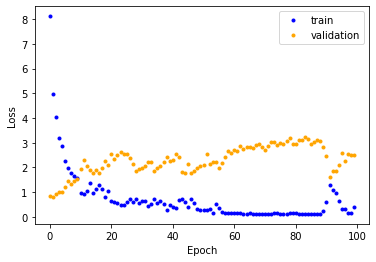

In [328]:
plt.plot(train_loss, '.', color='b', label='train')
plt.plot(validation_loss, '.', color='orange', label='validation')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

#### Saving a model

After finish training a model, we save the model to disk so that we can load the same weights at a later time. For this, we extract the so-called `state_dict` from the model which contains all learnable parameters. For our simple model, the state dict contains the following entries:

In [275]:
state_dict = model.state_dict()
print(state_dict)

OrderedDict([('linear1.weight', tensor([[-0.0162,  0.0406,  0.0210,  ..., -0.0476,  0.0006, -0.0168],
        [-0.0076,  0.0122, -0.0054,  ..., -0.0290, -0.0062,  0.0225],
        [-0.0138, -0.0421,  0.0042,  ...,  0.0389, -0.0028, -0.0254],
        ...,
        [-0.0135,  0.0140,  0.0150,  ...,  0.0045, -0.0230,  0.0163],
        [ 0.0097, -0.0218, -0.0489,  ..., -0.0207,  0.0351,  0.0256],
        [-0.0008, -0.0262, -0.0064,  ...,  0.0004,  0.0471, -0.0160]],
       device='cuda:0')), ('linear1.bias', tensor([ 0.0292,  0.0700, -0.0653,  0.0274,  0.0693,  0.0647,  0.0745,  0.0718,
        -0.0612,  0.0965, -0.0499,  0.0940,  0.0352,  0.0482, -0.0682, -0.0796,
         0.1124, -0.0640, -0.0643,  0.0695, -0.0975, -0.1115, -0.0565, -0.0602,
        -0.0715,  0.0808,  0.0840,  0.0926,  0.0666, -0.0365, -0.0536, -0.0603,
        -0.0777,  0.0340,  0.0717,  0.0424,  0.0997, -0.1097, -0.0701, -0.0218,
         0.0451,  0.0733,  0.1100, -0.0536,  0.0667,  0.1331, -0.1037,  0.0829,
         0.

To save the state dictionary, we can use `torch.save`:


In [276]:
# torch.save(object, filename). For the filename, any extension can be used
torch.save(state_dict, "our_model.tar")

To load a model from a state dict, we use the function `torch.load` to load the state dict from the disk, and the module function `load_state_dict` to overwrite our parameters with the new values:

In [277]:
# Load state dict from the disk (make sure it is the same name as above)
state_dict = torch.load("our_model.tar")

# Create a new model and load the state
new_model = SimpleClassifier(num_inputs=1024, num_hidden=512, num_outputs=1)
new_model.load_state_dict(state_dict)

# Verify that the parameters are the same
print("Original model\n", model.state_dict())
print("\nLoaded model\n", new_model.state_dict())

Original model
 OrderedDict([('linear1.weight', tensor([[-0.0162,  0.0406,  0.0210,  ..., -0.0476,  0.0006, -0.0168],
        [-0.0076,  0.0122, -0.0054,  ..., -0.0290, -0.0062,  0.0225],
        [-0.0138, -0.0421,  0.0042,  ...,  0.0389, -0.0028, -0.0254],
        ...,
        [-0.0135,  0.0140,  0.0150,  ...,  0.0045, -0.0230,  0.0163],
        [ 0.0097, -0.0218, -0.0489,  ..., -0.0207,  0.0351,  0.0256],
        [-0.0008, -0.0262, -0.0064,  ...,  0.0004,  0.0471, -0.0160]],
       device='cuda:0')), ('linear1.bias', tensor([ 0.0292,  0.0700, -0.0653,  0.0274,  0.0693,  0.0647,  0.0745,  0.0718,
        -0.0612,  0.0965, -0.0499,  0.0940,  0.0352,  0.0482, -0.0682, -0.0796,
         0.1124, -0.0640, -0.0643,  0.0695, -0.0975, -0.1115, -0.0565, -0.0602,
        -0.0715,  0.0808,  0.0840,  0.0926,  0.0666, -0.0365, -0.0536, -0.0603,
        -0.0777,  0.0340,  0.0717,  0.0424,  0.0997, -0.1097, -0.0701, -0.0218,
         0.0451,  0.0733,  0.1100, -0.0536,  0.0667,  0.1331, -0.1037,  0.0

A detailed tutorial on saving and loading models in PyTorch can be found [here](https://pytorch.org/tutorials/beginner/saving_loading_models.html).

### Evaluation

모델 학습이 모두 끝난 후, 평가를 test set을 이용해서 진행한다. 

Once we have trained a model, it is time to evaluate it on a held-out test set. As our dataset consist of randomly generated data points, we need to first create a test set with a corresponding data loader.

In [278]:
test_data_loader = data.DataLoader(test_dataset, batch_size=128, shuffle=False, drop_last=False) 

평가를 위해서 accuracy를 우선 계산해본다. 

그리고 모델을 평가할 때, 추론을 수행할 때는 gradient 계산이 필요 없으므로 `with torch.no_grad(): ...` 문을 사용해주는 것이 좋다. 


As metric, we will use accuracy which is calculated as follows:

$$acc = \frac{\#\text{correct predictions}}{\#\text{all predictions}} = \frac{TP+TN}{TP+TN+FP+FN}$$

where TP are the true positives, TN true negatives, FP false positives, and FN the fale negatives. 

When evaluating the model, we don't need to keep track of the computation graph as we don't intend to calculate the gradients. This reduces the required memory and speed up the model. In PyTorch, we can deactivate the computation graph using `with torch.no_grad(): ...`. Remember to additionally set the model to eval mode.

In [279]:
def eval_model(model, data_loader):
    model.eval() # Set model to eval mode
    true_preds, num_preds = 0., 0.
    
    with torch.no_grad(): # Deactivate gradients for the following code
        for data_inputs, data_labels in data_loader:
            
            # Determine prediction of model on dev set
            data_inputs, data_labels = data_inputs.to(device), data_labels.to(device)
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1)
            preds = torch.sigmoid(preds) # Sigmoid to map predictions between 0 and 1
            pred_labels = (preds >= 0.5).long() # Binarize predictions to 0 and 1
            
            # Keep records of predictions for the accuracy metric (true_preds=TP+TN, num_preds=TP+TN+FP+FN)
            true_preds += (pred_labels == data_labels).sum()
            num_preds += data_labels.shape[0]
            
    acc = true_preds / num_preds
    print(f"Accuracy of the model: {100.0*acc:4.2f}%")

#### sigmoid
------

[sigmoid](https://ko.wikipedia.org/wiki/%EC%8B%9C%EA%B7%B8%EB%AA%A8%EC%9D%B4%EB%93%9C_%ED%95%A8%EC%88%98)는 S자 곡선을 그리는 함수를 의미하며, 대체로 모든 실수 영역에서 [0,1] 또는 [-1,1] 영역의 값을 출력한다. 

대표적인 sigmoid 함수로는 로지스틱 함수가 있다. 

$f(x) = \frac{1}{ 1 + e^{-1} }$

In [280]:
eval_model(model, test_data_loader)

Accuracy of the model: 94.91%


## Multi-layer 모델
-----

이번에는 layer 개수가 더 많은 모델을 만들어 보자. 

In [319]:
class Classifier2(nn.Module):

    def __init__(self, num_inputs, num_hidden, num_outputs):
        super().__init__()
        # 네트워크를 구성하는 위한 기반이 되는 layer들을 정의한다. 
        self.linear1 = nn.Linear(num_inputs, num_hidden)
        self.linear2 = nn.Linear(num_hidden, num_hidden)
        self.linear3 = nn.Linear(num_hidden, num_hidden)
        self.linear4 = nn.Linear(num_hidden, num_outputs)
        self.act_fn = nn.Tanh()

    def forward(self, x):
        # Perform the calculation of the model to determine the prediction
        x = self.linear1(x)
        x = self.act_fn(x)
        x = self.linear2(x)
        x = self.act_fn(x)
        x = self.linear3(x)
        x = self.act_fn(x)
        x = self.linear4(x)

        return x

In [320]:
model2 = Classifier2(num_inputs=1024, num_hidden=512, num_outputs=1)

In [321]:
model2.to(device)

Classifier2(
  (linear1): Linear(in_features=1024, out_features=512, bias=True)
  (linear2): Linear(in_features=512, out_features=512, bias=True)
  (linear3): Linear(in_features=512, out_features=512, bias=True)
  (linear4): Linear(in_features=512, out_features=1, bias=True)
  (act_fn): Tanh()
)

In [322]:
# Input to the optimizer are the parameters of the model: model.parameters()
optimizer = torch.optim.Adam(model2.parameters(), lr=0.001)

In [323]:
train_loss, validation_loss = train_model(model2, optimizer, train_loader, loss_module)

  2%|▏         | 2/100 [00:00<00:16,  5.80it/s]

Epoch: 000, Training Loss: 8.1153, Validation Loss: 0.8324


  7%|▋         | 7/100 [00:01<00:16,  5.81it/s]

Epoch: 005, Training Loss: 2.2585, Validation Loss: 1.2092


 12%|█▏        | 12/100 [00:02<00:15,  5.76it/s]

Epoch: 010, Training Loss: 0.9596, Validation Loss: 1.9357


 17%|█▋        | 17/100 [00:02<00:14,  5.84it/s]

Epoch: 015, Training Loss: 1.1125, Validation Loss: 1.9091


 22%|██▏       | 22/100 [00:03<00:13,  5.90it/s]

Epoch: 020, Training Loss: 0.6411, Validation Loss: 2.5518


 27%|██▋       | 27/100 [00:04<00:12,  5.83it/s]

Epoch: 025, Training Loss: 0.5847, Validation Loss: 2.5573


 31%|███       | 31/100 [00:05<00:14,  4.62it/s]

Epoch: 030, Training Loss: 0.6429, Validation Loss: 1.9687


 36%|███▌      | 36/100 [00:06<00:15,  4.25it/s]

Epoch: 035, Training Loss: 0.5631, Validation Loss: 1.9811


 42%|████▏     | 42/100 [00:08<00:12,  4.71it/s]

Epoch: 040, Training Loss: 0.4065, Validation Loss: 2.3151


 47%|████▋     | 47/100 [00:08<00:09,  5.67it/s]

Epoch: 045, Training Loss: 0.3888, Validation Loss: 2.1333


 52%|█████▏    | 52/100 [00:09<00:08,  5.92it/s]

Epoch: 050, Training Loss: 0.2704, Validation Loss: 2.1078


 57%|█████▋    | 57/100 [00:10<00:07,  5.89it/s]

Epoch: 055, Training Loss: 0.3452, Validation Loss: 1.9631


 62%|██████▏   | 62/100 [00:11<00:06,  5.93it/s]

Epoch: 060, Training Loss: 0.1357, Validation Loss: 2.7140


 67%|██████▋   | 67/100 [00:12<00:05,  5.73it/s]

Epoch: 065, Training Loss: 0.1477, Validation Loss: 2.8083


 72%|███████▏  | 72/100 [00:13<00:04,  5.70it/s]

Epoch: 070, Training Loss: 0.1218, Validation Loss: 2.7219


 77%|███████▋  | 77/100 [00:14<00:03,  5.88it/s]

Epoch: 075, Training Loss: 0.1203, Validation Loss: 2.9839


 82%|████████▏ | 82/100 [00:14<00:03,  5.83it/s]

Epoch: 080, Training Loss: 0.1597, Validation Loss: 2.9543


 87%|████████▋ | 87/100 [00:15<00:02,  5.69it/s]

Epoch: 085, Training Loss: 0.1336, Validation Loss: 2.9301


 92%|█████████▏| 92/100 [00:16<00:01,  5.80it/s]

Epoch: 090, Training Loss: 0.5923, Validation Loss: 2.4800


 97%|█████████▋| 97/100 [00:17<00:00,  5.91it/s]

Epoch: 095, Training Loss: 0.3052, Validation Loss: 2.5923


100%|██████████| 100/100 [00:18<00:00,  5.49it/s]


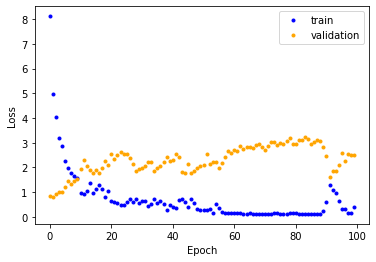

In [329]:
plt.plot(train_loss, '.', color='b', label='train')
plt.plot(validation_loss, '.', color='orange', label='validation')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

In [324]:
eval_model(model2, test_data_loader)

Accuracy of the model: 94.22%


# Homework: 

1) Tox21의 다른 타겟의 독성을 선택하여 레이어 개수가 3, 5, 7, 숨겨진 차원의 크기가 128, 256, 1024인 MLP 모델을 훈련시켜 보라. 

2) 입력 fingerprint의 차원을 128이나 256으로 줄였을 때, 성능의 차이가 생기는지 확인해보라. 
